# Section 2. Distances between distributions

In [7]:
import torch
import numpy as np
import pyro
from pyro import distributions as distrs
import numpy.testing as np_testing
import seaborn as sns
sns.set(font_scale=1.5, rc={'figure.figsize':(11.7, 8.27)})
import matplotlib.pyplot as plt

## Space worms teeth distribution

Suppose that we're space-scientists visiting a distant, new planet and we've discovered a species of biting worms that we'd like to study. We've found that these worms have 10 teeth, but because of all the chomping away, many of them end up missing teeth. After collecting many samples we have come to this empirical probability distribution of the number of teeth in each worm:
 
![Space worms](https://images.squarespace-cdn.com/content/v1/54e50c15e4b058fc6806d068/1494401025139-ODE7CP2043TS1CO9MQSN/ke17ZwdGBToddI8pDm48kLuT3KTpMRZ2imBrzIWD9_5Zw-zPPgdn4jUwVcJE1ZvWEtT5uBSRWt4vQZAgTJucoTqqXjS3CfNDSuuf31e0tVG-_BClLJADi5Tjms1vR9XfE3ardhQXleMJTem2-1ZqRideLm3HbGNLisCtv4-dzhc/biting-worms.jpg?format=1000w)

Picture and idea credits: https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained

In [4]:
# ensure the probability adds up to 1
true_data = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
n = true_data.shape[0]
index = torch.arange(n).float()

In [5]:
np_testing.assert_almost_equal(true_data.sum().item(), 1., err_msg='Your probabilities do not sum up to 1!')

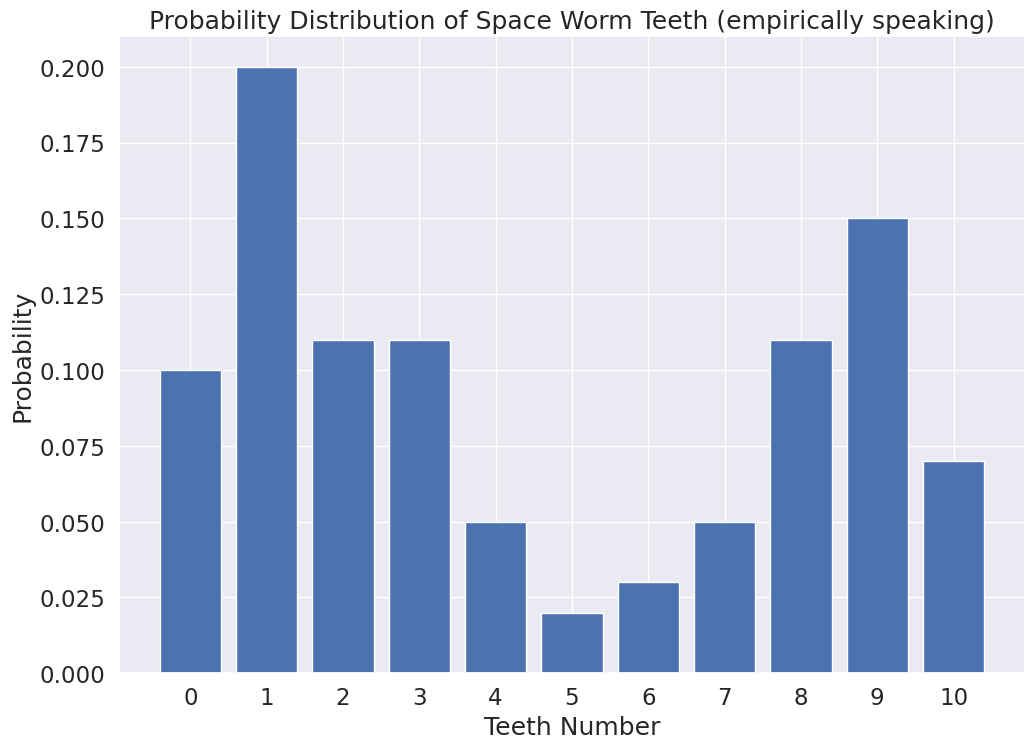

In [8]:
plt.figure()
plt.bar(index, true_data)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth (empirically speaking)')
plt.ylabel('Probability')
plt.xticks(index)
plt.show()

## Hypothesis about the data

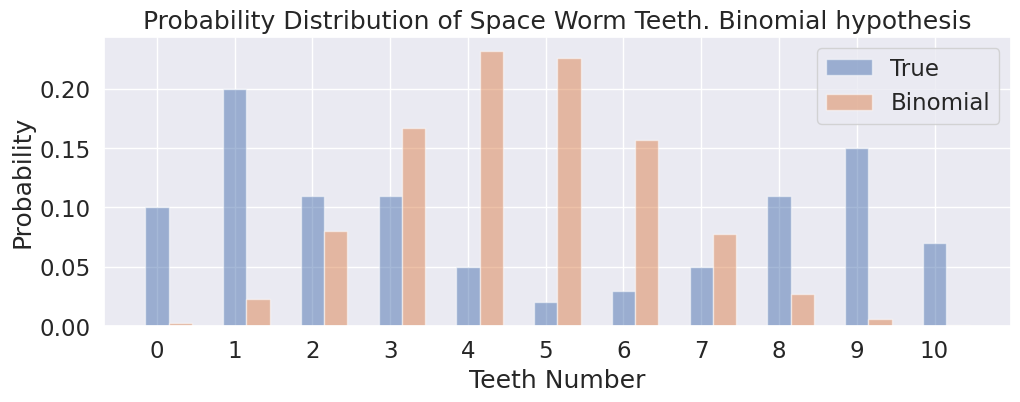

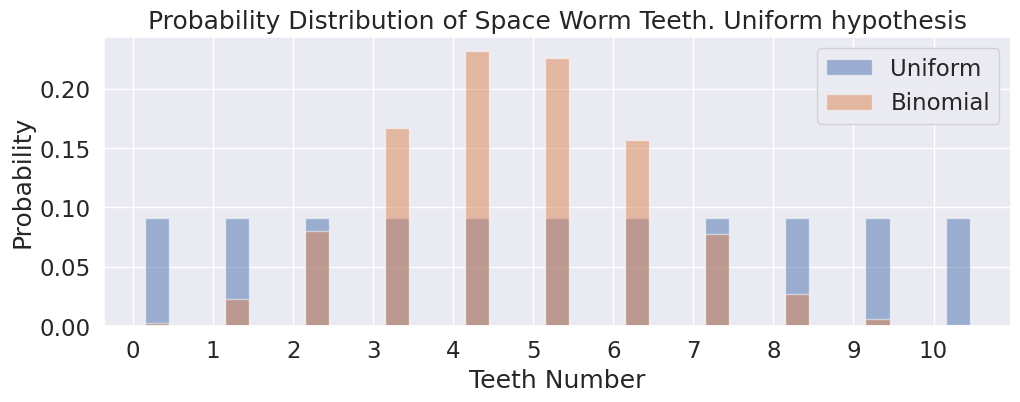

In [9]:
# uniform hypothesis samples
uniform_data = torch.full((n, ), 1.0 / n)

# binomial hypothesis samples
p = true_data.dot(index) / n
binomial_dist = distrs.Binomial(total_count=n, probs=p)
binom_data = binomial_dist.log_prob(index).exp()
width = 0.3

# plt.figure()
plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index, true_data, width=width, label='True', alpha=0.5)
# plt.bar(index + width, uniform_data, width=width, label='Uniform', alpha=0.5)
plt.bar(index + width, binom_data, width=width, label='Binomial', alpha=0.5)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth. Binomial hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()


plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index + width, uniform_data, width=width, label='Uniform', alpha=0.5)
plt.bar(index + width, binom_data, width=width, label='Binomial', alpha=0.5)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth. Uniform hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()

## Total variation distance
$$TVD(P||Q)=\sup_{x\in\Omega}|p(x)-q(x)|$$

In [10]:
def compute_tv_distance(p_probs: torch.Tensor, q_probs: torch.Tensor):
    # ??? # YOUR CODE HERE
    return torch.sum(torch.abs(p_probs - q_probs))

In [11]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()

print('TVD(True||Uniform): ', compute_tv_distance(true_data, uniform_data))
print('TVD(Uniform||True): ', compute_tv_distance(uniform_data, true_data))
print('TVD(True||Binomial): ', compute_tv_distance(true_data, binom_data))
print('TVD(Binomial||True): ', compute_tv_distance(binom_data, true_data))

TVD(True||Uniform):  tensor(0.4691)
TVD(Uniform||True):  tensor(0.4691)
TVD(True||Binomial):  tensor(1.1992)
TVD(Binomial||True):  tensor(1.1992)


In [ ]:
## GRADED PART, DO NOT CHANGE! 

q1 = compute_tv_distance(true_data, uniform_data)

In [ ]:
## GRADED PART, DO NOT CHANGE! 
q2 = compute_tv_distance(uniform_data, true_data)

In [ ]:
## GRADED PART, DO NOT CHANGE! 
q3 = compute_tv_distance(true_data, binom_data)

In [ ]:
## GRADED PART, DO NOT CHANGE! 
q4 =  compute_tv_distance(binom_data, true_data)

## KL divergence
$$KL ( P||Q ) = \int_{\mathbb{R}^n}p(x)\log\left( \frac{p(x)}{q_{\theta}(x)}\right) dx$$

In [ ]:
# Implement KL divergence below
def compute_kl_divergence(p_probs: torch.Tensor, q_probs: torch.Tensor):
    """"
    KL (P || Q) = \int_{R^n}p(x)\log\left( \frac{p(x)}{q_{\theta}(x)}\right) = 
                = \sum_i p_i log(p_i / q_i)
    
    Note:
        1. The output -- kl_div -- should be one number that is equal to KL (P || Q)
        2. Do not forget to clamp your probabilities to avoid log(0) and (x / 0) problems!
    """
    EPS = 1e-7
    kl_div = torch.sum(p_probs * torch.log((p_probs + EPS) / (q_probs + EPS))).item()
    return kl_div

In [ ]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()


print('KL(True||Uniform): ', compute_kl_divergence(true_data, uniform_data))
print('KL(Uniform||True): ', compute_kl_divergence(uniform_data, true_data))
print('KL(True||Binomial): ', compute_kl_divergence(true_data, binom_data))
print('KL(Binomial||True): ', compute_kl_divergence(binom_data, true_data))

In [ ]:
## GRADED PART, DO NOT CHANGE! 
q5 = compute_kl_divergence(true_data, uniform_data)

In [ ]:
## GRADED PART, DO NOT CHANGE! 
q6 = compute_kl_divergence(uniform_data, true_data)

In [ ]:
## GRADED PART, DO NOT CHANGE! 
q7 = compute_kl_divergence(true_data, binom_data)

In [ ]:
## GRADED PART, DO NOT CHANGE! 
q8= compute_kl_divergence(binom_data, true_data)

## Jensen–Shannon divergence
$$JS ( P||Q ) = \frac{KL ( P||Q ) + KL ( Q||P )}{2}$$

In [ ]:
# Implement JS divergence below
def compute_js_divergence(p_probs: torch.Tensor, q_probs: torch.Tensor):
    js_div = 0.5 * (compute_kl_divergence(p_probs, 0.5 * (p_probs + q_probs)) + compute_kl_divergence(q_probs, 0.5 * (p_probs + q_probs)))  # YOUR CODE HERE
    return js_div

In [ ]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()


print('JS(True||Uniform): ', compute_js_divergence(true_data, uniform_data))
print('JS(Uniform||True): ', compute_js_divergence(uniform_data, true_data))
print('JS(True||Binomial): ', compute_js_divergence(true_data, binom_data))
print('JS(Binomial||True): ', compute_js_divergence(binom_data, true_data))

In [ ]:
q9 = compute_js_divergence(true_data, uniform_data)

In [ ]:
q10 = compute_js_divergence(uniform_data, true_data)

In [ ]:
q11 = compute_js_divergence(true_data, binom_data)

In [ ]:
q12 =  compute_js_divergence(binom_data, true_data)